# <center>Machine Learning Foundations Nanodegree</center>
## <center>Model Evaluation & Validation</center>
## <center>Project 4: Predicting Boston Housing Prices</center>
## <center><em> Created by Pradnyesh Gumaste </em></center>


# Project Overview
In this project, you will apply basic machine learning concepts on data collected for housing prices in the Boston, Massachusetts area to predict the selling price of a new home. You will first explore the data to obtain important features and descriptive statistics about the dataset. Next, you will properly split the data into testing and training subsets, and determine a suitable performance metric for this problem. You will then analyze performance graphs for a learning algorithm with varying parameters and training set sizes. This will enable you to pick the optimal model that best generalizes for unseen data. Finally, you will test this optimal model on a new sample and compare the predicted selling price to your statistics.

# Description
The Boston housing market is highly competitive, and you want to be the best real estate agent in the area. To compete with your peers, you decide to leverage a few basic machine learning concepts to assist you and a client with finding the best selling price for their home. Luckily, you’ve come across the Boston Housing dataset which contains aggregated data on various features for houses in Greater Boston communities, including the median value of homes for each of those areas. Your task is to build an optimal model based on a statistical analysis with the tools available. This model will then be used to estimate the best selling price for your clients' homes.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [10]:
# Importing all the required libraries for running the project
import numpy as np
import pandas as pd

import matplotlib.pyplot as pl

# Importing Scikit libraries as well
from sklearn.cross_validation import ShuffleSplit


# matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Import library for visualizing the visuals.py file
import visuals as vs

#We now load the Boston housing dataset provided by Udacity
housing_data= pd.read_csv('housing.csv')
pricing_data= housing_data['MEDV']
features_data = housing_data.drop('MEDV', axis = 1)

print "Boston housing dataset has {} data points with {} variables each.".format(*housing_data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration and Statistical Analysis of the dataset
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.


### Implementation: Calculate Statistics
We will import and use Numpy library to calculate the requested statistics by the rubric provided, by implementing the code block below. 

In [33]:
# Minimum housing value in the dataset
minimum_price = np.amin(pricing_data)

# Maximum housing value in the dataset
maximum_price = np.amax(pricing_data)

# Number of houses in the dataset
total_houses = pricing_data.size

# Mean house value of the dataset
mean_price = np.mean(pricing_data)

# Median house value of the dataset
median_price = np.median(pricing_data)

# Standard deviation of housing values of the dataset
std_dev = np.std(pricing_data)

# Show the calculated statistics


print "Boston Housing dataset statistics is listed as belows:\n"
print "Total number of houses:",total_houses
print "Minimum house price:${0:,.2f}".format(minimum_price)
print "Maximum house price:${0:,.2f}".format(maximum_price)
print "Mean house price: ${0:,.2f}".format(mean_price)
print "Median house price:${0:,.2f}".format(median_price)
print "Standard deviation of house price: ${0:,.2f}".format(std_dev)

Boston Housing dataset statistics is listed as belows:

Total number of houses: 489
Minimum house price:$105,000.00
Maximum house price:$1,024,800.00
Mean house price: $454,342.94
Median house price:$438,900.00
Standard deviation of house price: $165,171.13


-----
### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.





I would guess the following behaviour of the features:
<ul>
  <li>Number of rooms in the house refers to the size of the house. I would consideer that the price of the house should be expected to be higher if there are more number of rooms in the particular house.<br>

  <li>Percentage of homeowners in the neighborhood considered "lower       class" (working poor) refers to the number of working poor people among all people in the neighborhood. This feature might refer to how safe is the house.
According to official statistics provided by the police, courts and the government, in countries  the USA the working class, the young and some minority ethnic groups are more likely to commit crimes than the middle class, the elderly, females and whites.
So accoring to the inferences made above, the higher percentage of working poor class people in the neighborhood, the lower should be the price of the house.<br>

  <li>I would consider intuitively that higher ratio of students to teachers, the lower price of the houses. Since the ratio of students to teachers in primary and secondary schools is hard to predict without proper data to calculate it, I would guess that district schools would have higher budgets for salary so lower ratio of students to teachers. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [34]:
# Import 'r2_score'
from sklearn.metrics import r2_score

#Now we define the performance_metric function below:-

def performance_metric(y_true, y_predict):
    """ This function calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
#Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
#Return the score
    return score

----
### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [35]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
According to the model above, it captures the variation of the particular targetted variable.However if more data points are provided, it can improve the accuracy of the model, although it has a pretty strong correlation.

----

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [36]:
#Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features_data, pricing_data, test_size=0.2, random_state=0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **
<ul>

<li>If the model simply repeats labels which it has seen when the training set was used, it will fail to predict on unseen data which leads to overfitting.The model will have high variance towards the labelled data in simple words.
<li>Hence we split the data into training and testing in order to enable our model to make accurate pridictions when it faces unlabelled data.
<li>Random shuffling is done so that even if the data is in ordered sequence, an equal distribution of classes is obtained in our both, training and testing data sets used above.
</ul>


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

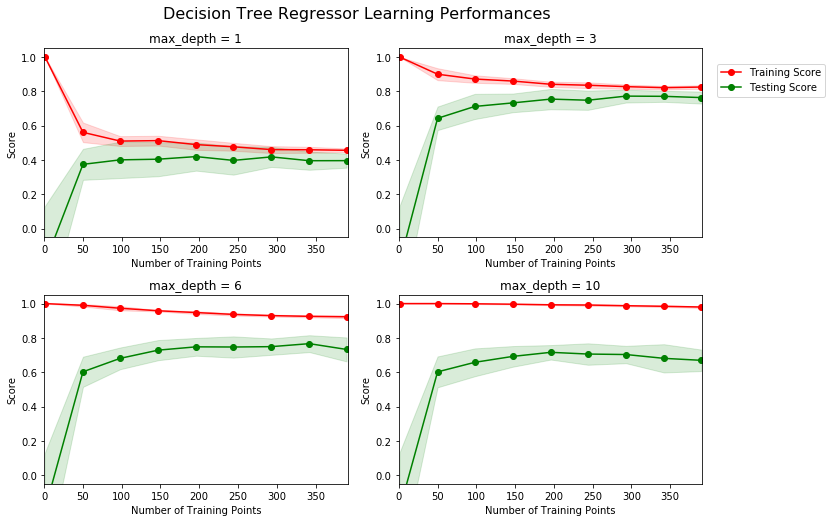

In [37]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features_data, pricing_data)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **
<ol>
<li>From the above created graphs, I would choose 2<sup>nd</sup> Graph with the max_depth=3
<li>
    <ul>
    <li>As we start adding more training points, the score of training curve starts decreasing along witht the variance decreasing as well.
        <li>However, the testing curve tends to show a different shape. It's score increases as more and more data points are added, till 300. After that point, it tends to decrease and run side by side with the training curve.
       </ul>
<li> We can observe from above points that increasing data points may not be effiecient as both the training and testing curve eventually run parallel. Incrementing the data points will only result in more time consumption for training and testing the model.
</ol>
 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

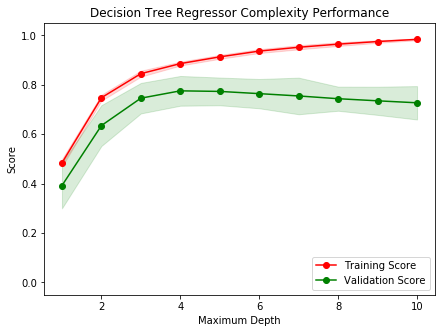

In [38]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **
<ul>

<li>The training score and validation score are significatnly lower becuase the model suffers from underfitting as seen above with a maximum depth of 1.The model is not sufficiently trained and does not achive strong validations score of barely 0.4. This displays high bias.

<li>On the other end, at the maximum depth of 10, the model suffers from overfitting, or high variance.The model has been overtrained in this case and while it performs great with training data, it performs poorly with validation score.

<li>The major difference between Training score and Validations score justifies the conclusion obtained above. A model that has high variance will perform well on training data since it tends to  become overfitted towards the data, but will perform poorly on test data. As a result ,it generates the large divergence between the lines.


<li>A good indication of high bias can be found where the two lines are pretty close together(at max_depth=1) but the overall performance is pretty poor(raning between 0.35-0.4) for both traing data and testing data.This gives a low R^2 value and underfitting occurs. It is over generalized, scoring a very low accuracy during both training and testing. While a model that suffers from high variance, tends to be the opposite. It has a high R^2 value (approaching 1) and is overfitting the data. Although the performance between training and testing data is relatively consistent, there are not enough features for the model to perform well and so it is underfitted.

</ul>



### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **
Max_depth=3 would give us the best generalized model because<ul>
<li>Both validation and training curves are at their smallest level of uncertainty between each other. Mean while the validation score is near its summit(highest) value.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **
<ol>
<li>The Grid Search Technique is an iteration technique that automates the process of tuning parameters of a model in order to obtain and achieve the best performance.
<li> Parameters are undergone evaluation for every set in the Cartesian product of each parameter range.Every possible combination of parameters is tested against a scoring function.
<li> The scoring function depends solely on the R^2 test to check the correlation strength, and after testing all combinations of values, the one with highest R^2 score is selected.


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **
<ul>

<li>The k-fold cross-validation technique can be defined as a method of dividing the data points into smaller number of k bins. Afetr the division, we test on the k bins and training occurs on the the other half i.e k-1 bins. After that, the averae of k-testing experiments is used as the overall caluclated result of the model.

<li>By using this technique, we esure that the entire data is properly used for training and testing, which is very useful when sample size is considerably small. The k-fold techniue also generates a more powerful and accurate model.

<li>Although grid search automates the parameter selection and tuning for best performance, not using cross-validation could result in the model being tuned only to a specific subset of data. Without using a technique such as cross-validation, it will not shuffle your data points. Utilizing cross-validation eliminates this issue by using the entire dataset allowing grid search to optimize parameter tuning across all data points.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [39]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

###DecisionTreeRegressor is previously included in [3]
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : range(1, 11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    gridsearch = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.

    # Fit the grid search object to the data to compute the optimal model
    gridsearch = gridsearch.fit(X, y)

    # Return the optimal model after fitting the data
    return gridsearch.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [40]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **
As we can see above, the optimal model has max_depth of 4. This number is almost near to the max_depth that we predicted above in question 6

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [41]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer: **
<ul>
<li> <em><strong>Client 1:-</em></strong> 
     <p> The price predicted for Client 1 comes very close to the          mean price of $391k(within 1 std deviation from mean)            and the price also apparently falls between Client 2 and          Client 3.  
     
<li>  <em><strong>Client 2:-</em></strong>
     <p> The price quoted is close to the minimum price and although there is high neighbourhood poverty level and lower number of teachers per student,  the 4 rooms are tedning to increase the price of the hoouse just over minimum price.
    
<li>  <em><strong>Client 3:-</em></strong>
     <p> With 8 rooms, low student-teacher ratio and very low neighborhood poverty levels, the selling price of this house is almost near the maximum selling price in the neighborhood and is priced at apt amount.

</ul>
     
     


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [42]:
vs.PredictTrials(features_data, pricing_data, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **<br>
<br>
*The results obtained from model created will only be usefull in making a quick estimated value quotation for a particular house, but the values may not be reliable enough unless we fine tune the model. It might be usefull in metropolitian areas but it is dubious to say the same for rural areas. The model should be used only as a extra tool for aiding the real estate evaluation, but it shouldnt be used as the sole source of predicting the cost of the houses.*

<ol>
<li> The dataset used for training the model is obsolete and cannot be used in today i.e the data was collected year back.

<li> The designed model tends to be vague and not well generalized. After running it multiple times for a specific clients, it  provides a wide range of variance in the pricing of the houses,which would cause issue in real world applications.

<li>A model training on dataset obtained from a city such as Boston won't be suitable to be used in urban areas. it would be accurate enough if it was used for another city as well.

<li> The dataset lacks the latest fetaures that affect the pricing of the houses. As a result, the selling prices could vary a lot if this model is used to predict the selling prices of the houses located in Boston.

</ol>

However, if more data is supplied to the model along with certain additional features present in latest homes, the model will be accurate enough to predict real tiem prices as well.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.